In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import numpy as np
import tensorflow as tf
import elvet
import matplotlib.pyplot as plt
from scipy import interpolate
import pandas as pd

Metal device set to: Apple M1
 Elvet: If you use Elvet in research, please cite arXix:2103.14575


In [2]:
Jb_data = np.loadtxt("JB_table.txt", dtype=float)
Jb_data = Jb_data[(-100 <= Jb_data[:,0]) & (Jb_data[:,0] <= 100)]

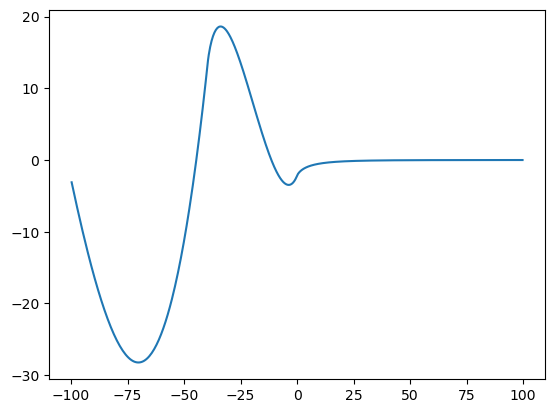

In [3]:
plt.plot(Jb_data[:,0], Jb_data[:,1])
plt.show()

In [4]:
domain = elvet.box((-100, 100, 4001)) 

model = elvet.nn(1, 25, 25, 25, 1)

In [5]:
Jb_interpol = interpolate.splrep(Jb_data[:,0], Jb_data[:,1], k=3, s=0)
y_Jb = lambda x : tf.cast(interpolate.splev(x.numpy(), Jb_interpol, der=0), domain.dtype)

In [6]:
fitter_Jb = elvet.fitter(domain, y_Jb(domain), model=model, epochs=50000, lr=0.001)

 Elvet: Setting optimizer parameter 'lr' to 0.001
 Elvet: epoch = 1, loss = 1.46e+02, elapsed time = 00:00:00
 Elvet: epoch = 10000, loss = 7.58e-01, elapsed time = 00:00:46
 Elvet: epoch = 20000, loss = 3.90e-01, elapsed time = 00:01:31
 Elvet: epoch = 30000, loss = 3.89e-01, elapsed time = 00:02:17
 Elvet: epoch = 40000, loss = 9.26e-04, elapsed time = 00:03:02
 Elvet: epoch = 50000, loss = 3.41e-04, elapsed time = 00:03:48


In [7]:
y_Jb = lambda x : tf.cast(interpolate.splev(x, Jb_interpol, der=0), domain.dtype)

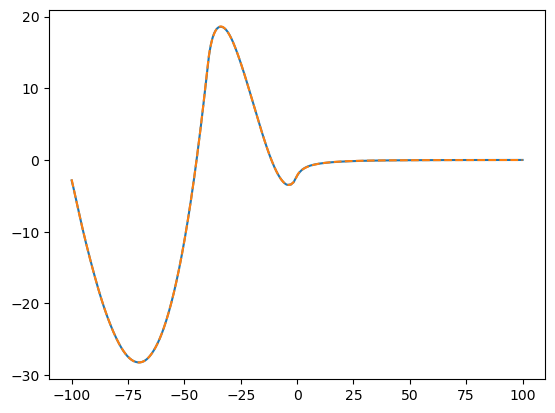

In [9]:
x = np.linspace(-100,100,3001)
plt.plot(x, fitter_Jb.model(x))
plt.plot(x, y_Jb(x), linestyle="dashed")
plt.show()

In [15]:
fitter_Jb.model.save("Jb_model")